# Neuroniniai tinklai
## 1 labaratorinis darbas, $\:$Robert Tarasevič, tsf-17
***

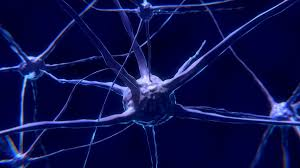

## TURINYS:
1. [Uzduotis. Praleistu reiksmiu atstatymas](#pirma) <br>
    1.1 [Praleista reiksme pakeiciame stulpelio vidurkiu](#1.1) <br>
    1.2 [Praleista reiksme pakeiciame stulpelio mediana](#1.2) <br>
    1.3 [Praleista reiksme pakeiciame vidurkiu atsizvelgiant i lyti](#1.3) <br>
    1.4 [Praleista reiksme pakeiciame mediana atsizvelgiant i lyti](#1.4) <br>
2. [Uzduotis. Praleistu reiksmiu atstatymas naudojant atstumo metrikas](#antra) <br>
    2.1 [Sudarome funkcija duomenu atstatymui taikant skirtingu metriku skaiciavimus (Euklido, Manhattan ir Chebyshev)](#2.1) <br>
3. [Uzduotis. Praleistos reiksmes atstatymas taikant koreliacijos koeficienta](#trecia) <br>
4. [Uzduotis. Rekomendacinės sistemos kūrimas](#ketvirta)
5. [Uzduotis. Rekomendacinės sistemos kūrimas, taikant koreliacijos koeficiento skaičiavimą](#penkta)
6. [Uzduotis. Neatitikčių paieška, taikant Šovene kriterijų](#sesta)
7. [Uzduotis. Neatitikčių paieška, taikant Kvartilių algoritmą](#septinta)

In [83]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
from scipy.spatial.distance import euclidean, cityblock, chebyshev, squareform

## 1 Uzduotis <a class="anchor" id="pirma"></a>
Parašykite programą, kuri atstatytų ūgio reikšmę iš kitų Ūgio požymio reikšmių, atliekant vidurkio
ir medianos skaičiavimą. Atstatant nežinomą reikšmę atsižvelkite į paciento lytį. Duomenis galite
įvedinėti rankomis arba nuskaityti iš failo.

In [84]:
df = pd.DataFrame({
    'Pacientas': ['Vardas 1', 'Vardas 2', 'Vardas 3', 'Vardas 4', 'Vardas 5', 'Vardas 6'], 
    'Lytis': [0, 1, 0, 1, 1, 1],
    'Ugis': [165, 183, 171, 194, np.nan, 185],
    'Svoris': [55, 95, 60, 102, 80, 90]})
df

,Pacientas,Lytis,Ugis,Svoris
0,Vardas 1,0,165.0,55
1,Vardas 2,1,183.0,95
2,Vardas 3,0,171.0,60
3,Vardas 4,1,194.0,102
4,Vardas 5,1,NaN,80
5,Vardas 6,1,185.0,90


### Praleista reiksme pakeiciame stulpelio vidurkiu <a class="anchor" id="1.1"></a>

In [85]:
df_1 = df['Ugis'].fillna(np.mean(df['Ugis']), inplace = False)
df_1

0    165.0
1    183.0
2    171.0
3    194.0
4    179.6
5    185.0
Name: Ugis, dtype: float64

### Praleista reiksme pakeiciame stulpelio mediana <a class="anchor" id="1.2"></a>

In [86]:
df_2 = df['Ugis'].fillna(df['Ugis'].median(), inplace = False)
df_2


0    165.0
1    183.0
2    171.0
3    194.0
4    183.0
5    185.0
Name: Ugis, dtype: float64

### Praleista reiksme pakeiciame vidurkiu atsizvelgiant i lyti <a class="anchor" id="1.3"></a>
Pasižiūrime kokie yra skirtingų lyčių svorio ir ūgio vidurkiai

In [87]:
lyciu_vid = round(df.groupby(['Lytis']).mean(),2)
lyciu_vid

,Ugis,Svoris
Lytis,,
0,168.00,57.50
1,187.33,91.75


Į praleistą reikšmę įrašome atitinkamos lyties vidurkį.

In [88]:
df_3 = round(df.fillna(df.groupby('Lytis').transform('mean')), 2)
df_3

,Pacientas,Lytis,Ugis,Svoris
0,Vardas 1,0,165.00,55
1,Vardas 2,1,183.00,95
2,Vardas 3,0,171.00,60
3,Vardas 4,1,194.00,102
4,Vardas 5,1,187.33,80
5,Vardas 6,1,185.00,90


### Praleista reiksme pakeiciame mediana atsizvelgiant i lyti <a class="anchor" id="1.4"></a>
Pasižiūrime kokios yra skirtingų lyčių svorio ir ūgio medianos

In [89]:
lyciu_mediana = df.groupby(['Lytis']).median()
lyciu_mediana

,Ugis,Svoris
Lytis,,
0,168.0,57.5
1,185.0,92.5


Į praleistą reikšmę įrašome atitinkamos lyties svorio medianą.

In [90]:
df_4 = round(df.fillna(df.groupby('Lytis').transform('median')), 2)
df_4

,Pacientas,Lytis,Ugis,Svoris
0,Vardas 1,0,165.0,55
1,Vardas 2,1,183.0,95
2,Vardas 3,0,171.0,60
3,Vardas 4,1,194.0,102
4,Vardas 5,1,185.0,80
5,Vardas 6,1,185.0,90


***

## 2 Uzduotis <a class="anchor" id="antra"></a>
Parašykite programą, kuri atstatytų (1 lentelės) praleistą reikšmę, taikant skirtingų metrikų
skaičiavimą, t. y. Euklido, Manhattan ir Max-metriką. Atlikite duomenų normalizavimą, naudojant
vidurkį ir vidutinį kvadratinį nuokrypį.

In [91]:
df

,Pacientas,Lytis,Ugis,Svoris
0,Vardas 1,0,165.0,55
1,Vardas 2,1,183.0,95
2,Vardas 3,0,171.0,60
3,Vardas 4,1,194.0,102
4,Vardas 5,1,NaN,80
5,Vardas 6,1,185.0,90


In [92]:
ugis = df['Ugis'] # pasirenkame ugio stulpelį
ugis_arr = (ugis - ugis.mean())/ugis.std() # normalizacija
ugis_arr = ugis_arr[~np.isnan(ugis_arr)] # ismetame stulpelį su praleista reikšme
#ugis_arr

new_df = df.drop(['Ugis', 'Pacientas'], 1)
new_normalized = (new_df - new_df.mean())/new_df.std() # normalizuojam

A = new_normalized.iloc[4, :] # eilute su praleista reiksme
new_normalized_without_A = new_normalized.drop(4) # panaikiname eilute su praleista reiksme


In [93]:
A

Lytis     0.645497
Svoris   -0.017408
Name: 4, dtype: float64

Konvertuojame pandas data frame i numpy array

In [94]:
X = new_normalized_without_A.to_numpy()
A = A.to_numpy()

# PATAISYTI !!!

In [95]:
ugis_arr

0   -1.262190
1    0.293935
2   -0.743482
3    1.244900
5    0.466837
Name: Ugis, dtype: float64

#### Sudarome funkcija duomenu atstatymui taikant skirtingu metriku skaiciavimus (Euklido, Manhattan ir Chebyshev) <a class="anchor" id="2.1"></a>

In [96]:
def atstatymas(X, ugis_arr, A, ugis, metrika):
    tmp_1 = 0
    tmp_2 = 0
    for x, u in zip(X, ugis_arr):
        if metrika == 'Euklido':
            #print(euclidean(A, x))
            tmp = 1/euclidean(A, x)
            tmp_1 += tmp

            tmp_2 += u/tmp
            
        elif metrika == 'Manhattan':
            tmp = 1/cityblock(A, x)
            tmp_1 += tmp

            tmp_2 += u/tmp
            
        elif metrika == 'Chebyshev':
            tmp = 1/chebyshev(A, x)
            tmp_1 += tmp

            tmp_2 += u/tmp
        
    praleista_reiksme = round((1/tmp_1)*tmp_2 * ugis.std()  + ugis.mean(), 2) # graziname is normalizuotos i tikraja reiksme
    
    return print("Praleista reiksme pagal {} metrika yra: {} cm".format(metrika, praleista_reiksme))

In [97]:
metrikos = ['Euklido', 'Manhattan', 'Chebyshev']
for metrika in metrikos:
    atstatymas(X, ugis_arr, A, ugis, metrika)

Praleista reiksme pagal Euklido metrika yra: 173.33 cm
Praleista reiksme pagal Manhattan metrika yra: 168.77 cm
Praleista reiksme pagal Chebyshev metrika yra: 175.11 cm


***
## 3 uzduotis <a class="anchor" id="trecia"></a>
Parašykite programą, kuri atstatytų (1 lentelės) praleistą reikšmę, taikant koreliacijos koeficientą.
Palyginkite gautus rezultatus 1-3 užduotyse. Parašykite savo komentarą, kuris būdas, tiksliausiai
atstatė trūkstamą reikšmę.

In [98]:
df

,Pacientas,Lytis,Ugis,Svoris
0,Vardas 1,0,165.0,55
1,Vardas 2,1,183.0,95
2,Vardas 3,0,171.0,60
3,Vardas 4,1,194.0,102
4,Vardas 5,1,NaN,80
5,Vardas 6,1,185.0,90


Nustatome kurioje eiluteje yra praleista reiksme

In [99]:
row_n = df.loc[pd.isna(df['Ugis']), :].index[0]
row_n

4

In [100]:
P_ugis = np.mean(df['Ugis']) # Ugio pozymio vidurkis

P_j = df[['Lytis', 'Svoris']] # objektu pozymiai isskyrus pozymi su praleista reiksme

Pilna koreliaciju matrica

In [101]:
rho = df.corr()
rho

,Lytis,Ugis,Svoris
Lytis,1.000000,0.915460,0.923654
Ugis,0.915460,1.000000,0.967977
Svoris,0.923654,0.967977,1.000000


In [102]:
rho = rho.drop(['Lytis', 'Svoris'], 1) # pasaliname lyties ir svorio stulpelius
rho = rho.drop(rho.index[[1]]) # pasaliname eilute, kuri rodo ugio koreliacija su paciu savimi
rho

,Ugis
Lytis,0.915460
Svoris,0.967977


In [103]:
P_praleista = P_ugis
skaitiklis = 0
vardiklis = 0

for i, (col,cor) in enumerate(zip(rho.axes[0], rho.to_numpy())):
    skaitiklis += cor*(df[col][row_n]-np.mean(df[col]))
    vardiklis += np.abs(cor)
    if i == len(rho.axes[0]):
        P_praleista += skaitiklis/vardiklis # skaiciuojam objektui A P_r reiksme
    
P_praleista

179.6

### Išvados

Skirtingų algoritmų rezultatai labai panašūs, intuityviai atrodo, kad praleistą reikšmę pakeičiant vidurkių arba medianą (atsižvelgiant į lytį) gavome geriausius rezultatus, tačiau dabar mūsų turimas duomenų kiekis yra labai mažas, tad ne aišku kaip būtų buvę esant didesniam duomenų kiekiui, taip pat gerus rezultatus užpildant praleistą reikšmę parodė taikant koreliacijos koeficientą.

***
## 4 uždavinys „Rekomendacinės sistemos kūrimas, turint anoniminių naudotojų duomenis“. <a class="anchor" id="ketvirta"></a>
Lentelėje pateikti anoniminių naudotojų duomenys, kurie apsipirkinėjo moterų drabužių
internetinėje parduotuvėje. Sistema nefiksuoja vartotojų asmeninių duomenų, todėl nežino jų
skonio. Ši rekomendacinė sistema, pirkimo eigoje (vartotojui pasirenkant vieną iš prekių į pirkimo
krepšelį) turi pasiūlyti sekančią prekę, kuri turėtų sudominti pirkėją. Prekių panašumo laipsnį,
nustatykite skaičiuojant Euklido metriką.

In [104]:
prekes_df = pd.DataFrame({
    'Klasikine suknele' : [1,1,1,0,0,0,1],
    'Retro suknele' : [0,1,0,0,1,0,0],
    'Klasikinis kostiumas su kelnemis' : [0,0,0,1,0,1,1],
    'Klasikinis kostiumas su sijonu' : [0,0,1,0,0,0,0],
    'Kelnes' : [0,1,0,1,0,0,0],
    'Sijonas' : [1,0,0,0,1,1,0]
})
prekes_df = prekes_df.transpose()
prekes_df

,0,1,2,3,4,5,6
Klasikine suknele,1,1,1,0,0,0,1
Retro suknele,0,1,0,0,1,0,0
Klasikinis kostiumas su kelnemis,0,0,0,1,0,1,1
Klasikinis kostiumas su sijonu,0,0,1,0,0,0,0
Kelnes,0,1,0,1,0,0,0
Sijonas,1,0,0,0,1,1,0


Atstumu matrica

In [105]:
from scipy.spatial import distance_matrix

atstumu_matrica = pd.DataFrame(distance_matrix(prekes_df.values, prekes_df.values), index=prekes_df.index, columns=prekes_df.index)
atstumu_matrica

,Klasikine suknele,Retro suknele,Klasikinis kostiumas su kelnemis,Klasikinis kostiumas su sijonu,Kelnes,Sijonas
Klasikine suknele,0.000000,2.000000,2.236068,1.732051,2.000000,2.236068
Retro suknele,2.000000,0.000000,2.236068,1.732051,1.414214,1.732051
Klasikinis kostiumas su kelnemis,2.236068,2.236068,0.000000,2.000000,1.732051,2.000000
Klasikinis kostiumas su sijonu,1.732051,1.732051,2.000000,0.000000,1.732051,2.000000
Kelnes,2.000000,1.414214,1.732051,1.732051,0.000000,2.236068
Sijonas,2.236068,1.732051,2.000000,2.000000,2.236068,0.000000


In [106]:
1.732051print("REKOMENDACINE SISTEMA\n\n")
for rubas in atstumu_matrica:
    tmp = atstumu_matrica[rubas].sort_values()[:4]
    print("Prie", tmp.index[0], "siulome:\n") # pasirinkta preke
    print("\t{},\n\t{}\n\t{}".format(tmp.index[1], tmp.index[2], tmp.index[3]))
    print("__________________________________")
    print('\n')


SyntaxError: invalid syntax (<ipython-input-106-6ed87c8d46f1>, line 1)

# PATAISYTI !!!

## 5 uždavinys „Rekomendacinės sistemos kūrimas, taikant koreliacijos koeficiento skaičiavimą “. <a class="anchor" id="penkta"></a>
Sukurkite savo rekomendacinę sistemą, pvz. kito filmų peržiūros portalui. Filmai vertinami penkių
balų sistemoje. Lentelėje numatykite 7 požymius (filmus) ir 5 objektus (vartotojus).
Rekomendaciją pasiūlykite 6-am vartotojui, kuris iš 5 filmų įvertino 3. Parašykite programą.

In [108]:
filmai_df = pd.DataFrame({
    'Zvaigzdziu karai' : [4,3,2,1,5,np.nan],
    'Titanikas' : [0,1,5,1,3,np.nan],
    'Haris Poteris' : [4,5,4,5,2,np.nan],
    'Greiti ir isiute I' : [5,4,1,0,4,5],
    'Ziedu valdovas' : [5,4,0,2,3,np.nan],
    'Greiti ir isiute II' : [5,4,2,1,4,5],
    'Greiti ir isiute III' : [5,4,1,1,5,5]
})
#filmai_df = filmai_df.transpose()
filmai_df

,Zvaigzdziu karai,Titanikas,Haris Poteris,Greiti ir isiute I,Ziedu valdovas,Greiti ir isiute II,Greiti ir isiute III
0,4.0,0.0,4.0,5,5.0,5,5
1,3.0,1.0,5.0,4,4.0,4,4
2,2.0,5.0,4.0,1,0.0,2,1
3,1.0,1.0,5.0,0,2.0,1,1
4,5.0,3.0,2.0,4,3.0,4,5
5,NaN,NaN,NaN,5,NaN,5,5


In [109]:
filmai_df.loc[5,:]

Zvaigzdziu karai        NaN
Titanikas               NaN
Haris Poteris           NaN
Greiti ir isiute I      5.0
Ziedu valdovas          NaN
Greiti ir isiute II     5.0
Greiti ir isiute III    5.0
Name: 5, dtype: float64

Randame vartotojus, kurie 3 filmus įvertino panašiausiai kaip mūsų 6-asis vartotojas

In [110]:
a = filmai_df.loc[5,:] # vartotojas kuriam norime rekomenduoti filma
atstumai = [] # atstumai tarp vartotoju filmu pomegiu
for i in range(len(filmai_df)-1):
    b = filmai_df.loc[i,:]
    atstumai.append(np.sqrt(np.nansum((a-b)**2)))
    
atstumai

[0.0,
 1.7320508075688772,
 6.4031242374328485,
 7.54983443527075,
 1.4142135623730951]

In [111]:
kandidato_nr = np.argmin(atstumai) # vartotojas su maziausiu atstumu i musu stebima vartotoja
print("Vartotojas numeris: {}, filmus vertina panasiausiai".format(kandidato_nr))

Vartotojas numeris: 0, filmus vertina panasiausiai


Rekomendacine programa:

In [112]:
ivertinimas = 5
siulomas_filmas = []

for flag, balas, filmas  in zip(pd.isnull(filmai_df).sum()>0, filmai_df.loc[kandidato_nr,:], filmai_df.loc[kandidato_nr,:].index):
    if flag:
        if balas < ivertinimas:
            siulomas_filmas = filmas

print("Rekomenduojame pasiziureti filma: {}, sio filmo vidutinis ivertinimas yra {} balai".format(siulomas_filmas, filmai_df[siulomas_filmas].mean()))

Rekomenduojame pasiziureti filma: Haris Poteris, sio filmo vidutinis ivertinimas yra 4.0 balai


***
## Neatitikčių (anomalijų) paieška
Duotas duomenų masyvas: A=[15, 16000, 20000, 550, 22000, 24000, 15000, 18000, 373]
## 6 uždavinys „Neatitikčių paieška, taikant Šovene kriterijų“. <a class="anchor" id="sesta"></a>
Duotajame A masyve raskite neatitikčių (anomalijų), taikant Šovene kriterijų.
$erfc\Big(\frac{|p_i- \bar{p_i}}{S_p}\Big) < \frac{1}{2n}$

# +PATAISYTAS !!!

In [63]:
from matplotlib import pyplot as plt
from scipy import special

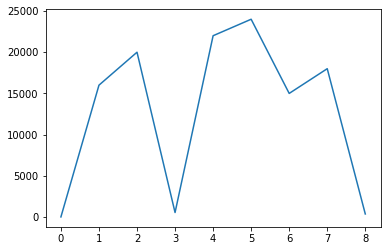

In [79]:
A=[15, 16000, 20000, 550, 22000, 24000, 15000, 18000, 373]
plt.plot(A)

In [80]:
def nustatyti_id(A):
    X = np.abs(A - np.mean(A))/np.std(A)
    n = len(X)
    C = 1/(2*n)
    return np.where(special.erfc(X) < C)[0][0]

In [81]:
iteracijos = 4 # iteraciju skaicius

if iteracijos > len(A):
    iteracijos = len(A)
for j in range(iteracijos):
    idx = nustatyti_id(A)
    print(A[idx], "yra anomalija")
    A = np.delete(A, idx)
print(A)
    #n = len(X)
    #C = 1/(2*n)
    #for i, x in enumerate(X):
    #    if special.erfc(x) < C:
    #        print(A[i], "yra anomalija")
    #        break
    #X = np.delete(X, i)

15 yra anomalija
550 yra anomalija
373 yra anomalija
24000 yra anomalija
[16000 20000 22000 15000 18000]


## 7 uždavinys „Neatitikčių paieška, taikant Kvartilių algoritmą“. <a class="anchor" id="septinta"></a>
Duotajame A masyve raskite neatitikčių (anomalijų), taikant Kvartilių algoritmą.

In [30]:
q75, q25 = np.percentile(A, [75 ,25])
IQR = q75 - q25

apatinis = q25 - 1.5*IQR
virsutinis = q75 + 1.5*IQR

print("Apatinis rezis: {} \nVirsutinis rezis: {}".format(apatinis, virsutinis))

Apatinis rezis: -28625.0 
Virsutinis rezis: 49175.0


Tikriname ar yra elementu, kurie iseina uz musu nustatytu reziu

In [31]:
X = np.delete(X, i)flag = 0
for i,x in enumerate(A):
    if (apatinis>x or x>virsutinis):
        print(x, "Yra anomalija")
        flag+=1
    if i == len(A)-1:
        if flag==0:
            print("Pagal interkvartiliu metoda, anomaliju neaptikta!")

Pagal interkvartiliu metoda, anomaliju neaptikta!
